In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('wb_data.csv')

In [36]:
df.head(100)

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LE,LP,...,NGDPRPC,NGDPRPPPPC,NGDP_D,NGDP_FY,NGDP_RPCH,PCPI,PCPIPCH,PPPGDP,PPPPC,PPPSH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,0.000,32.941,...,39127.080,2328.76,120.050,1547.290,-2.351,120.671,5.607,80.912,2456.29,0.061
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,0.000,2.878,...,280984.500,13394.46,203.320,1644.080,-3.482,108.613,1.621,40.658,14128.00,0.031
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,0.000,43.851,...,163208.890,10746.03,256.869,18383.800,-5.100,211.180,2.415,497.030,11334.53,0.374
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.045,0.078,...,30447.350,49728.24,106.557,2.531,-11.184,102.298,0.257,4.092,52451.57,0.003
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,0.000,31.031,...,47219.950,6482.35,2293.820,33611.360,-5.750,431.227,22.277,212.172,6837.35,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Liberia,-0.498,-16.389,31.267,-3.841,-2.555,58.657,35.108,0.000,5.058,...,610.449,1363.90,98.364,3.037,-2.967,856.247,16.953,7.276,1438.59,0.005
96,Libya,-3.974,-8.477,35.079,-22.279,-22.279,0.000,57.358,0.000,6.644,...,9711.010,15714.55,100.824,65.048,-29.476,328.318,1.468,110.119,16575.15,0.083
97,Lithuania,4.146,7.338,34.907,-7.268,-6.677,46.580,42.175,1.358,2.795,...,15514.770,37178.19,114.172,49.507,-0.132,110.628,1.062,109.599,39214.23,0.082
98,Luxembourg,3.016,4.115,43.743,-3.420,-3.653,24.750,47.163,0.472,0.626,...,95177.830,113851.21,107.769,64.221,-1.777,105.938,0.005,75.187,120086.20,0.057


In [37]:
column_names = list(df)
column_names

['Country',
 'BCA',
 'BCA_NGDPD',
 'GGR_NGDP',
 'GGXCNL_NGDP',
 'GGXONLB_NGDP',
 'GGXWDG_NGDP',
 'GGX_NGDP',
 'LE',
 'LP',
 'LUR',
 'NGDP',
 'NGDPD',
 'NGDPDPC',
 'NGDPPC',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDP_D',
 'NGDP_FY',
 'NGDP_RPCH',
 'PCPI',
 'PCPIPCH',
 'PPPGDP',
 'PPPPC',
 'PPPSH']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       195 non-null    object 
 1   BCA           195 non-null    float64
 2   BCA_NGDPD     195 non-null    float64
 3   GGR_NGDP      195 non-null    float64
 4   GGXCNL_NGDP   195 non-null    float64
 5   GGXONLB_NGDP  195 non-null    float64
 6   GGXWDG_NGDP   195 non-null    float64
 7   GGX_NGDP      195 non-null    float64
 8   LE            195 non-null    float64
 9   LP            195 non-null    float64
 10  LUR           195 non-null    float64
 11  NGDP          195 non-null    float64
 12  NGDPD         195 non-null    float64
 13  NGDPDPC       195 non-null    float64
 14  NGDPPC        195 non-null    float64
 15  NGDPRPC       195 non-null    float64
 16  NGDPRPPPPC    195 non-null    float64
 17  NGDP_D        195 non-null    float64
 18  NGDP_FY       195 non-null    

In [39]:
#df['NGDPRPC'] = df['NGDPRPC'].astype(float)
#df['PPPSH'] = df['PPPSH'].astype(float)
#df.loc[:, df.columns != 'Country'].astype(float)

##### Data Split 1: all of our final dataset, no scaling

In [40]:
# NGDPDPC - gdp_per_capita
y = df['NGDPDPC']
X = df.drop(['NGDPDPC','Country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Data Split 2: all of our final dataset, with scaling

In [41]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: feature selected dataset, no scaling

In [42]:
y3 = y
X3 = df.drop(['NGDPDPC',
 'BCA',
 'Country',
 'GGR_NGDP',
 'GGXCNL_NGDP',
 'GGXONLB_NGDP',
 'GGXWDG_NGDP',
 'GGX_NGDP',
 'LP',
 'NGDP',
 'NGDPD',
 'NGDPPC',
 'NGDPRPC',
 'PPPPC'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

##### Data Split 4: feature selected dataset, with scaling

In [43]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

##### Model Training

In [44]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

##### Predictions

In [45]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

##### Evaluation

In [46]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 4397.928977909899
RMSE: 5766.181011169655
R2_Score:  0.8204943571592658

all features, with scaling:
MAE: 2066575.648593061
RMSE: 2610478.695522904
R2_Score:  -36790.02340673407

selected features, No scaling:
MAE: 3606.4904876716246
RMSE: 5002.266209842077
R2_Score:  0.8649062794101751

selected features, with scaling:
MAE: 5689.4835822759715
RMSE: 8423.599855041128
R2_Score:  0.6169133487910939


From the metrics above, it is clear that feature selection is essential for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on LR's prediction performance. we got decent prediction performance from LR with feature selection and scaling.

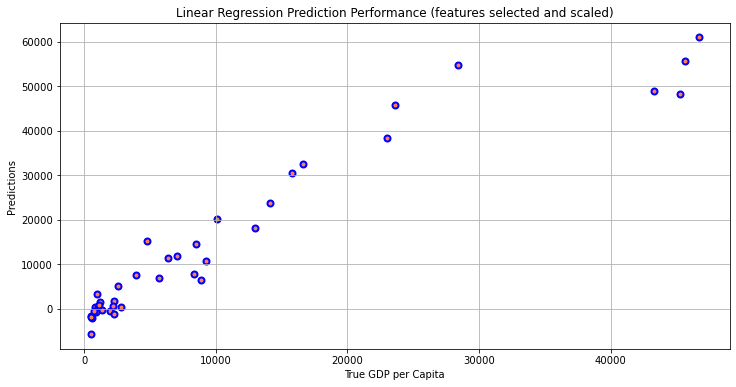

In [47]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

From the metrics above, it is clear that feature selection is essential for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on LR's prediction performance.
we got decent prediction performance from LR with feature selection and scaling.

In [ ]:
#Results of sklearn.metrics:
#MAE: 0.5833333333333334
#RMSE: 0.8660254037844386
#R-Squared: 0.8655043586550436 